<a href="https://colab.research.google.com/github/ifelsejet/pokeML/blob/main/Copy_of_Pkemon_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import time
import PIL.Image as Image
from IPython.display import display

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# return number of folders in dataset
print(len(os.listdir('/content/drive/MyDrive/PokemonData')))
# return number of images in a folder
print(len(os.listdir('/content/drive/MyDrive/PokemonData/Mew')))

150
54


In [4]:
labels = os.listdir('/content/drive/MyDrive/PokemonData')

In [5]:
root_path = '/content/drive/MyDrive/PokemonData'
classes = sorted(os.listdir(root_path))
print(len(classes),classes)

150 ['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking',

Total number of pokemons: 150
Total number of images: 6837


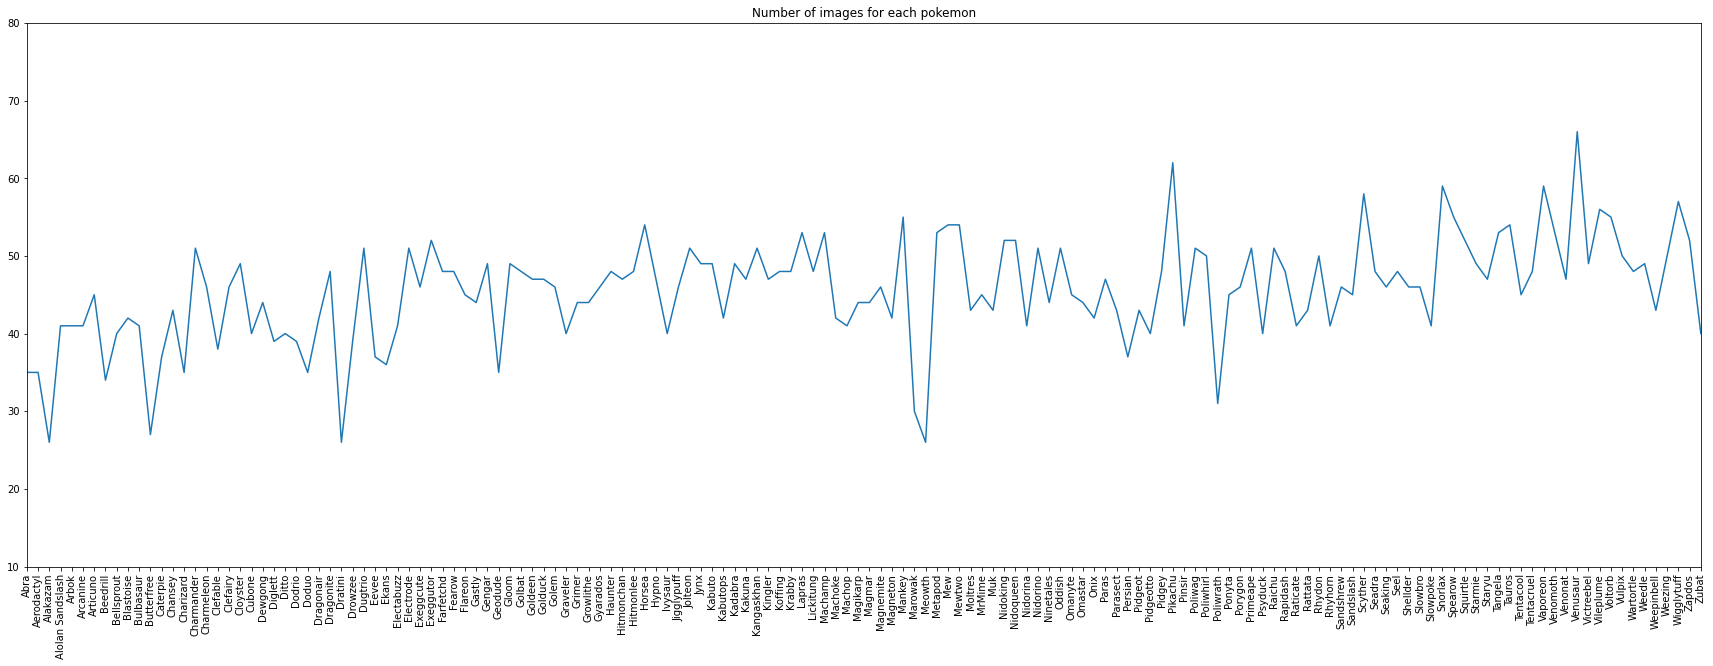

In [6]:
count=0
count_dict = {}
print(f'Total number of pokemons: {len(classes)}')
for pokemon in classes:
    dir_path = os.path.join(root_path,pokemon)
    count+=len(os.listdir(dir_path))
    count_dict[pokemon] = len(os.listdir(dir_path))
print(f'Total number of images: {count}')
fig = plt.figure(figsize = (30, 10))
sns.lineplot(x = list(count_dict.keys()), y = list(count_dict.values())).set_title('Number of images for each pokemon')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.ylim(10,80)
plt.show()

In [7]:
sorted_list =  sorted(count_dict.items(), key=lambda item: item[1], reverse=True)
sorted_list

[('Venusaur', 66),
 ('Pikachu', 62),
 ('Snorlax', 59),
 ('Vaporeon', 59),
 ('Scyther', 58),
 ('Wigglytuff', 57),
 ('Vileplume', 56),
 ('Mankey', 55),
 ('Spearow', 55),
 ('Voltorb', 55),
 ('Horsea', 54),
 ('Mew', 54),
 ('Mewtwo', 54),
 ('Tauros', 54),
 ('Lapras', 53),
 ('Machamp', 53),
 ('Metapod', 53),
 ('Tangela', 53),
 ('Venomoth', 53),
 ('Exeggutor', 52),
 ('Nidoking', 52),
 ('Nidoqueen', 52),
 ('Squirtle', 52),
 ('Zapdos', 52),
 ('Charmander', 51),
 ('Dugtrio', 51),
 ('Electrode', 51),
 ('Jolteon', 51),
 ('Kangaskhan', 51),
 ('Nidorino', 51),
 ('Oddish', 51),
 ('Poliwag', 51),
 ('Primeape', 51),
 ('Raichu', 51),
 ('Poliwhirl', 50),
 ('Rhydon', 50),
 ('Vulpix', 50),
 ('Weezing', 50),
 ('Cloyster', 49),
 ('Gengar', 49),
 ('Gloom', 49),
 ('Jynx', 49),
 ('Kabuto', 49),
 ('Kadabra', 49),
 ('Starmie', 49),
 ('Victreebel', 49),
 ('Weedle', 49),
 ('Dragonite', 48),
 ('Farfetchd', 48),
 ('Fearow', 48),
 ('Golbat', 48),
 ('Haunter', 48),
 ('Hitmonlee', 48),
 ('Koffing', 48),
 ('Krabby', 48),

In [8]:
#%%
dataset_dir = root_path

tfms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [9]:
dataset = torchvision.datasets.ImageFolder(root=dataset_dir, transform = tfms)

torch.Size([3, 400, 400])
Label (numeric): 0
Label (textual): Abra


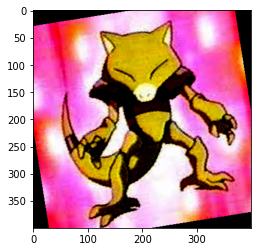

In [10]:
img, label = dataset[0]
print(img.shape)
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [11]:
torch.manual_seed(100)

In [12]:
train_size = int(len(dataset)*0.85)
val_size = int(len(dataset)*0.15)

In [13]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(5797, 1023)

In [14]:
trainloader = DataLoader(train_ds, batch_size = 32, shuffle=True, num_workers = 2)
testloader = DataLoader(val_ds, batch_size = 32, shuffle=False, num_workers = 2)

images.shape: torch.Size([32, 3, 400, 400])


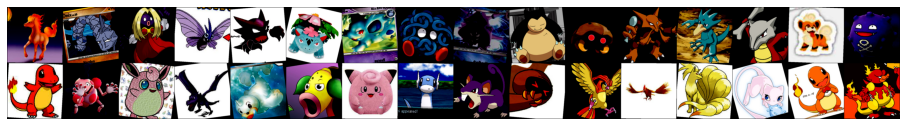

In [15]:
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [16]:
def train_model(model, criterion, optimizer, scheduler, n_epochs = 5):

    losses = []
    accuracies = []
    test_accuracies = []
    # set the model to train mode initially
    model.train()
    for epoch in range(n_epochs):
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        for i, data in enumerate(trainloader, 0):

            # get the inputs and assign them to cuda
            inputs, labels = data
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # calculate the loss/acc later
            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()

        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(trainloader)
        epoch_acc = 100/32*running_correct/len(trainloader)
        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))

        losses.append(epoch_loss)
        accuracies.append(epoch_acc)

        # switch the model to eval mode to evaluate on test data
        model.eval()
        test_acc = eval_model(model)
        test_accuracies.append(test_acc)

        # re-set the model to train mode after validating
        model.train()
        scheduler.step(test_acc)
        since = time.time()
    print('Finished Training')
    return model, losses, accuracies, test_accuracies

In [17]:
def eval_model(model):
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for i, data in enumerate(testloader, 0):
            images, labels = data


            outputs = model_ft(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100.0 * correct / total
    print('Accuracy of the network on the test images: %d %%' % (
        test_acc))
    return test_acc

In [18]:
model_ft = models.resnet34(pretrained=True)
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 150) #No. of classes = 150

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
model_ft, training_losses, training_accs, test_accs = train_model(model_ft, criterion, optimizer, lrscheduler, n_epochs=5)

In [ ]:
model_ft.eval()

In [ ]:
plt.title('Training losses')
plt.plot(training_losses)
print(training_losses)

In [ ]:
plt.title('Training Accuracy')
plt.plot(training_accs)
print(training_accs)

In [ ]:
from sklearn.metrics import recall_score


In [ ]:
# switch the model to evaluation mode to make dropout and batch norm work in eval mode
model_ft.eval()

In [ ]:
test_imgs = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg']
y_true =[]
y_pred = []

# transforms for the input image
loader = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

for img in test_imgs:
    test_img_path = '/content/drive/MyDrive/data_testing/'+ img
    image = Image.open(test_img_path)
    image = loader(image).float()
    image = torch.autograd.Variable(image, requires_grad=True)
    image = image.unsqueeze(0)
    output = model_ft(image)
    conf, predicted = torch.max(output.data, 1)

    display(Image.open(test_img_path))
    print(classes[predicted.item()], "confidence: ", conf.item())
    y_pred.append(predicted.item()]
    y_true.append(conf.item()]
                  
recall_score(y_true, y_pred, average='macro')